# Step One
• Which dataset did you select? 

  * Student Performance - [link](https://archive-beta.ics.uci.edu/ml/datasets/student+performance)

• Which regulated domain does your dataset belong to? 

  * Education

• How many observations are in the dataset? 

  * 649

• How many variables in the dataset? 

  * 33

• Which variables did you select as your dependent variables? 

  * G3 - final Grade
  * Walc - weekend alcohol consumption

• How many and which variables in the dataset are associated with a legally recognized protected class? 

  * sex
  * age

• Which legal precedence/law (as discussed in the lectures) does each protected class fall under? 

  * sex (Equal Pay Act of 1963; Civil Rights Act of 1964, 1991)
  * age (Age Discrimination in Employment Act of 1967)

In [1]:
# Installing and Importing Libraries
!pip install gdown
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importing Dataset
!gdown 1Jdwvw8XQC-_2TxSUhPsWFbAYfzb8d4ST

Downloading...
From: https://drive.google.com/uc?id=1Jdwvw8XQC-_2TxSUhPsWFbAYfzb8d4ST
To: /content/student-por.csv
100% 93.2k/93.2k [00:00<00:00, 56.2MB/s]


## **Step 2**

* Table documenting the relationship between members and membership categories for each protected class variable (from Step 2.1) 

| Protected Class Variable | Members | Discrete Categories |
| ----------- | ----------- | ----------- |
| Sex | Male, Female | Male -> 1, Female -> 2 |
| Age | 15, 16, 17, 18, 19, 20, 21, 22 | (15, 16, 17, 18) -> 1, (19, 20, 21, 22) -> 2 |

Note: We separated the age groups based on high school (15-18) and college (19-22) age groups

* Table documenting the relationship between values and discrete categories/numerical values associated with your dependent variables (from Step 2.2) 

| Dependent Variable | Discrete Categories |
| ----------- | ----------- |
| G3 - Final Grade | 0,1,2,3 -> 1, 4,5,6,7 -> 2, 8,9,10,11 -> 3, 12,13,14,15 -> 4, 16,17,18,19 -> 5 |
| Walc - Weekend Alcohol Consumption | 1,2,3,4,5 |

Note: We separated the final grade groups based on Group 5 [A] (16-19), Group 4 [B] (12-15), Group 3 [C] (8-11), Group 2 [D] (4-7), and Group 1 [F] (0-3), and we kept weekend alcohol consumption values the same (numeric: from 1 - very low to 5 - very high)

In [3]:
# Frequency
df = pd.read_csv('student-por.csv', delimiter = ';')
df['sex'] = df['sex'].transform(lambda x:1 if x == 'M' else 2)
df['age'] = df['age'].transform(lambda x: 1 if x in [15,16,17,18] else 2)
df['G3_old'] = df['G3']
df['G3'] = df['G3'].transform(lambda x: 1 if x in [0,1,2,3] else 2 if x in [4,5,6,7] else 3 if x in [8,9,10,11] else 4 if x in [12,13,14,15] else 5)

numM = len(df.loc[df['sex']==1])
numF = len(df) - numM
numA1 = len(df.loc[df['age']==1])
numA2 = len(df) - numA1
print("Protected Variable - Sex: Male frequency = " + str(numM))
print("Protected Variable - Sex: Female frequency = " + str(numF))
print("Protected Variable - Age: Group 1 (High School Age) frequency = " + str(numA1))
print("Protected Variable - Age: Group 2 (College Age) frequency = " + str(numA2))

Protected Variable - Sex: Male frequency = 266
Protected Variable - Sex: Female frequency = 383
Protected Variable - Age: Group 1 (High School Age) frequency = 608
Protected Variable - Age: Group 2 (College Age) frequency = 41


* Table providing the computed frequency values for the membership categories each protected class variable (from Step 2.3)

| Protected Class Variable | Member Name | Frequency |
| ----------- | ----------- | ----------- |
| Sex | Male | 266 |
| Sex | Female | 383 |
| Age | Group 1 (High School Age) | 608 |
| Age | Group 2 (College Age) | 41 |

* Histograms derived from Step 2.4 

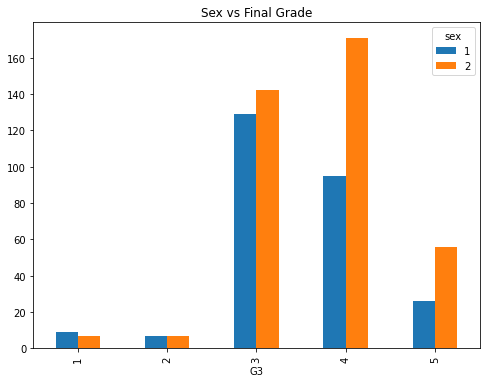

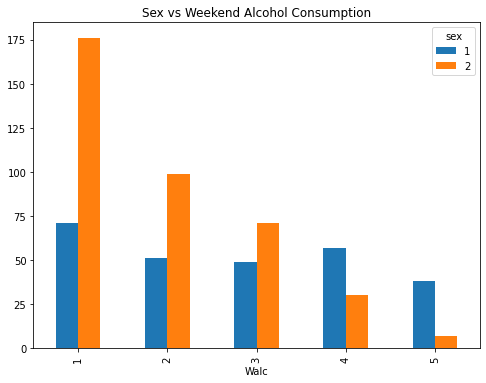

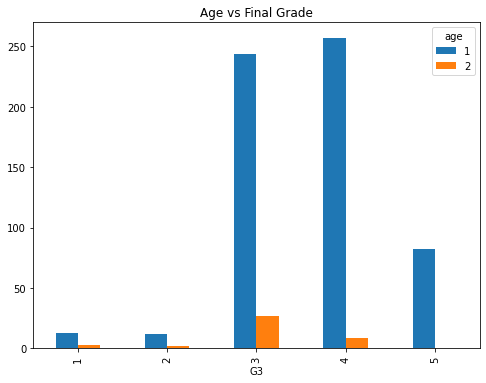

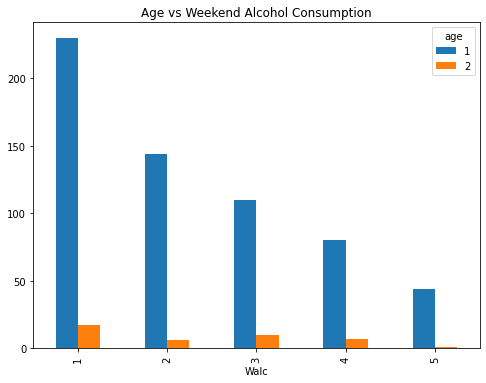

In [4]:
import matplotlib.pyplot as plt
# Sex vs Final Grade

sex_v_g3 = df.groupby(['G3', 'sex']).sex.count().unstack().plot.bar(legend=True, figsize=(8, 6))
sex_v_g3.title.set_text('Sex vs Final Grade')

# Sex vs Weekend Alcohol Consumption

sex_v_walc = df.groupby(['Walc', 'sex']).sex.count().unstack().plot.bar(legend=True, figsize=(8, 6))
sex_v_walc.title.set_text('Sex vs Weekend Alcohol Consumption')


# Age vs Final Grade

age_v_g3 = df.groupby(['G3', 'age']).age.count().unstack().plot.bar(legend=True, figsize=(8, 6))
age_v_g3.title.set_text('Age vs Final Grade')


# Age vs Weekend Alcohol Consumption

age_v_walc = df.groupby(['Walc', 'age']).age.count().unstack().plot.bar(legend=True, figsize=(8, 6))
age_v_walc.title.set_text('Age vs Weekend Alcohol Consumption')

In [5]:
!pip install aif360
!pip install BlackBoxAuditing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 13.9 MB/s 
     |████████████████████████████████| 25.9 MB 2.5 MB/s 
     |████████████████████████████████| 569 kB 7.3 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=1e627d638b27287f039d9aef39528a112b48b26d6cdd24287256cef222fbbd76
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.5.4 which is incompatible.
alb

In [7]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from sklearn.model_selection import train_test_split
from aif360.algorithms.preprocessing import Reweighing

# Step 3:


1) Based on your dataset, identify the privileged/unprivileged groups associated with each of your protected
class variables

| Protected Variable | Privileged | Unprivileged |
| ----------- | ----------- | ----------- |
| Sex | Male -> 1 | Female -> 2 |
| Age | (15, 16, 17, 18) -> 1 | (19, 20, 21, 22) -> 2 |

2) For each protected class variable, select two fairness metrics and compute the fairness metrics associated with
your privileged/unprivileged groups as a function of each of your two dependent variables. You may choose
any reasonable threshold in order to generate a baseline for comparison using the fairness metrics.

In [8]:
# do step 3 for Age / G3
df_binary = df[['age','sex','Walc','G3_old']]
# 2 = uses alcohol a lot, 1 = uses alcohol less (favorable)
df_binary['Walc'] = df_binary['Walc'].transform(lambda x: 2 if x in [4,5] else 1)
# 2 = score >= 70 (favorable), 1 = score < 70
df_binary['G3'] = df_binary['G3_old'].transform(lambda x: 2 if x in [13,14,15,16,17,18,19] else 1)
print('Walc transformed into [1,2,3]->1 (favorable) , [4,5]->2 (unfavorable)')
print('G3 transformed into <13 -> 1 (unfavorable) , [13,14,15,16,17,18,19]->2 (favorable)')
print('')
#print(df_binary.describe())
df_age_G3 = df_binary[['age','G3']]
bld = BinaryLabelDataset(favorable_label="2",
                                unfavorable_label="1",
                                df=df_age_G3,
                                label_names=['G3'],
                                protected_attribute_names=['age'],
                                unprivileged_protected_attributes=[{'age':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                      unprivileged_groups = [{'age':2}],
                                      privileged_groups = [{'age':1}])
print('For Age and G3')    
spd_32_1 = bldm.statistical_parity_difference()  
di_32_1 = bldm.disparate_impact()
print(f'statistical parity difference: {bldm.statistical_parity_difference()}')
print(f'disparate impact: {bldm.disparate_impact()}')

#Age and Walc
print('')
print('Age and Walc')
df_age_G3 = df_binary[['age','Walc']]
bld = BinaryLabelDataset(favorable_label="1",
                                unfavorable_label="2",
                                df=df_age_G3,
                                label_names=['Walc'],
                                protected_attribute_names=['age'],
                                unprivileged_protected_attributes=[{'age':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                      unprivileged_groups = [{'age':2}],
                                      privileged_groups = [{'age':1}])  

spd_32_2 = bldm.statistical_parity_difference()  
di_32_2 = bldm.disparate_impact()                                    
print(f'statistical parity difference: {bldm.statistical_parity_difference()}')
print(f'disparate impact: {bldm.disparate_impact()}')

# Sex and Walc
print('')
print('Sex and Walc')
df_age_G3 = df_binary[['sex','Walc']]
bld = BinaryLabelDataset(favorable_label="1",
                                unfavorable_label="2",
                                df=df_age_G3,
                                label_names=['Walc'],
                                protected_attribute_names=['sex'],
                                unprivileged_protected_attributes=[{'sex':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                      unprivileged_groups = [{'sex':2}],
                                      privileged_groups = [{'sex':1}]) 

spd_32_3 = bldm.statistical_parity_difference()  
di_32_3 = bldm.disparate_impact()                                     
print(f'statistical parity difference: {bldm.statistical_parity_difference()}')
print(f'disparate impact: {bldm.disparate_impact()}')

# Sex and G3
print('')
print('Sex and G3')
df_age_G3 = df_binary[['sex','G3']]
bld = BinaryLabelDataset(favorable_label="2",
                                unfavorable_label="1",
                                df=df_age_G3,
                                label_names=['G3'],
                                protected_attribute_names=['sex'],
                                unprivileged_protected_attributes=[{'sex':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                      unprivileged_groups = [{'sex':2}],
                                      privileged_groups = [{'sex':1}]) 

spd_32_4 = bldm.statistical_parity_difference()  
di_32_4 = bldm.disparate_impact()                                     
print(f'statistical parity difference: {bldm.statistical_parity_difference()}')
print(f'disparate impact: {bldm.disparate_impact()}')


Walc transformed into [1,2,3]->1 (favorable) , [4,5]->2 (unfavorable)
G3 transformed into <13 -> 1 (unfavorable) , [13,14,15,16,17,18,19]->2 (favorable)

For Age and G3
statistical parity difference: -0.3237724646983312
disparate impact: 0.27360273602736024

Age and Walc
statistical parity difference: 0.008825417201540509
disparate impact: 1.0110864745011088

Sex and Walc
statistical parity difference: 0.2605371130175307
disparate impact: 1.4052799535828255

Sex and G3
statistical parity difference: 0.1281827283613734
disparate impact: 1.3666301692916702



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Step 3.4 (combined age/sex)**

In [9]:
### DO NOT DELETE!!!!!!!!!!!
print(' ')
print('Age/Sex G3')
df_temp = df_binary[['age','sex','G3','Walc']]

bld = BinaryLabelDataset(favorable_label="2",
                                unfavorable_label="1",
                                df=df_temp,
                                label_names=['G3'],
                                protected_attribute_names=['age','sex'],
                                unprivileged_protected_attributes= [{'age':2, 'sex':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                      unprivileged_groups = [{'age':2, 'sex':2}],
                                      privileged_groups = [{'age':1,'sex':1}])                                  

rw = Reweighing(unprivileged_groups =  [{'age':2, 'sex':2}], privileged_groups =  [{'age':1, 'sex':1}])
trans_bld = rw.fit_transform(bld)
trans_bldm = BinaryLabelDatasetMetric(dataset = trans_bld,
                                      unprivileged_groups = [{'age':2, 'sex':2}],
                                      privileged_groups = [{'age':1,'sex':1}])
print('after transformation:')     
spd_34 = trans_bldm.statistical_parity_difference()  
di_34 = trans_bldm.disparate_impact()                                
print(f'statistical parity difference: {trans_bldm.statistical_parity_difference()}')
print(f'disparate impact: {trans_bldm.disparate_impact()}')

print('---')
### DO NOT DELETE!!!!!!!!!!!


 
Age/Sex G3
after transformation:
statistical parity difference: -5.551115123125783e-17
disparate impact: 0.9999999999999999
---


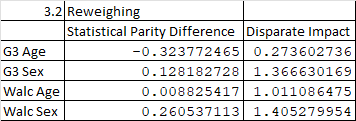

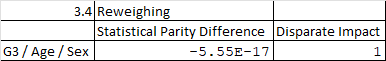

# Step 4:

1) Randomly split your original dataset into training and testing datasets, binning all values into ints

In [10]:
from sklearn import preprocessing
dont_change = ['sex','age','G3','Walc']

SEED = 1000
np.random.seed(SEED)

data4 = df.copy()
data4['G3'] = data4['G3_old'].transform(lambda x: 2 if x in [13,14,15,16,17,18,19] else 1)
data4=data4.drop(columns=['G3_old'])
le = preprocessing.LabelEncoder()
for col in data4.columns:
  if col not in dont_change:
    data4[col] = le.fit_transform(data4[col])
train_orig, test_orig = train_test_split(data4, test_size = 0.33, random_state = SEED)


2) Randomly split your transformed dataset into training and testing datasets (from Step 3.3)

In [11]:
df_small = data4[['age','sex','G3']]
bld = BinaryLabelDataset(favorable_label="2",
                                unfavorable_label="1",
                                df=df_small,
                                label_names=['G3'],
                                protected_attribute_names=['age','sex'],
                                unprivileged_protected_attributes= [{'age':2, 'sex':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                      unprivileged_groups = [{'age':1, 'sex':2}],
                                      privileged_groups = [{'age':1,'sex':1}]) 
print('ORIGINAL')
print(f'statistical parity difference: {bldm.statistical_parity_difference()}')
print(f'disparate impact: {bldm.disparate_impact()}')

rw = Reweighing(unprivileged_groups =  [{'age':2, 'sex':2}], privileged_groups =  [{'age':1, 'sex':1}])
trans_bld = rw.fit_transform(bld)
trans_bldm = BinaryLabelDatasetMetric(dataset = trans_bld,
                                      unprivileged_groups = [{'age':2, 'sex':2}],
                                      privileged_groups = [{'age':1,'sex':1}])
trans_df = trans_bld.convert_to_dataframe()[0]
temp_df = data4.copy()
temp_df.drop(columns= ['age','sex','G3'],inplace=True)
temp_df['age'] = trans_df['age'].values
temp_df['sex'] = trans_df['sex'].values
temp_df['G3'] = trans_df['G3'].values
print('Transformed')
print(f'statistical parity difference: {trans_bldm.statistical_parity_difference()}')
print(f'disparate impact: {trans_bldm.disparate_impact()}')
train_trans, test_trans = train_test_split(temp_df, test_size = 0.33, random_state = SEED)
# train_trans, test_trans = trans_train.split([1-.33], shuffle=True, seed=SEED)

ORIGINAL
statistical parity difference: 0.13593091027060888
disparate impact: 1.3719428204107869
Transformed
statistical parity difference: -5.551115123125783e-17
disparate impact: 0.9999999999999999


3) Train a classifier using the original training dataset from Step 4.1; select one of your dependent variables as
the output label to train your classifier.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree

x_orig = train_orig[train_orig.columns.difference(['G3'])]
y_orig = train_orig['G3']
clf_orig = LogisticRegression(random_state=SEED).fit(x_orig, y_orig)
#clf_orig = tree.DecisionTreeClassifier(random_state=SEED).fit(x_orig, y_orig)
x_test_orig = test_orig[test_orig.columns.difference(['G3'])]
y_pred_orig = clf_orig.predict(x_test_orig)
y_true_orig = test_orig['G3']

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


4) Train a classifier using the transformed training dataset from Step 4.2; select one of your dependent variables
as the output label to train your classifier.

In [13]:
x_trans = train_trans[train_trans.columns.difference(['G3'])]
y_trans = train_trans['G3']
# clf_trans = LogisticRegression(random_state=SEED).fit(x_trans, y_trans)
clf_trans = tree.DecisionTreeClassifier(random_state=SEED).fit(x_trans, y_trans)
x_test_trans = test_trans[test_trans.columns.difference(['G3'])]
y_pred_trans = clf_trans.predict(x_test_trans)
y_true_trans = test_trans['G3']

In [14]:
# fairness for original test set
new_df = test_orig[test_orig.columns.difference(['G3'])]
new_df['G3'] = y_pred_orig

#print(new_df.describe())
print('Age and G3 Original')
df_age_G3 = new_df[['age','G3']]
bld = BinaryLabelDataset(favorable_label="2",
                         unfavorable_label="1",
                         df=df_age_G3,
                         label_names=['G3'],
                         protected_attribute_names=['age'],
                         unprivileged_protected_attributes=[{'age':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                unprivileged_groups = [{'age':2}],
                                privileged_groups = [{'age':1}])   
                                
spd_45_1 = bldm.statistical_parity_difference()
di_45_1 = bldm.disparate_impact()
print(f'statistical parity difference: {bldm.statistical_parity_difference()}')
print(f'disparate impact: {bldm.disparate_impact()}')

# fairness for transformed test set
new_df = test_trans[test_trans.columns.difference(['G3'])]
new_df['G3'] = y_pred_trans

#print(new_df.describe())

print('Age and G3 Transformed')
df_age_G3 = new_df[['age','G3']]
bld = BinaryLabelDataset(favorable_label="2",
                         unfavorable_label="1",
                         df=df_age_G3,
                         label_names=['G3'],
                         protected_attribute_names=['age'],
                         unprivileged_protected_attributes=[{'age':2}])

bldm = BinaryLabelDatasetMetric(dataset = bld,
                                unprivileged_groups = [{'age':2}],
                                privileged_groups = [{'age':1}])   
                                  
spd_45_2 = bldm.statistical_parity_difference()
di_45_2 = bldm.disparate_impact()
print(f'statistical parity difference: {bldm.statistical_parity_difference()}')
print(f'disparate impact: {bldm.disparate_impact()}')

#print(test_trans.describe())

Age and G3 Original
statistical parity difference: -0.2838680926916221
disparate impact: 0.3904306220095694
Age and G3 Transformed
statistical parity difference: -0.2642602495543672
disparate impact: 0.40759240759240756


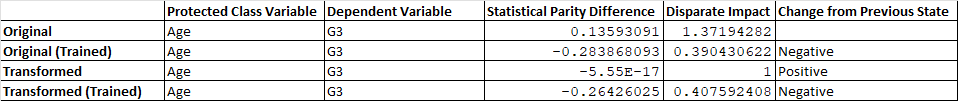


**Step 5**)

Team members:  
Anthony Mossing  
Jay Kavarthapu  
Shailesh Tappe  
Wendy Cai

Graph the results from applying the two fairness metrics on your
privileged/unprivileged groups as derived from Step 3.2, 3.4, and 4.5

For all Age graphs:   
Privileged Group: ages 15-18 (High School Age)  
Unprivileged Group: ages 19-22 (College Age)

For Sex graphs:
Privileged Group: M (Male)  
Unprivileged Group: F (Female)

Step 3.2 Metrics

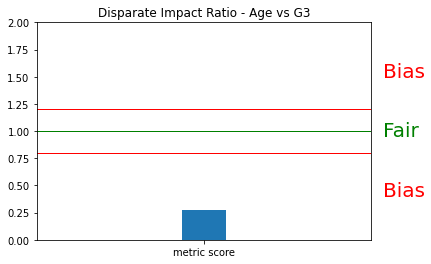

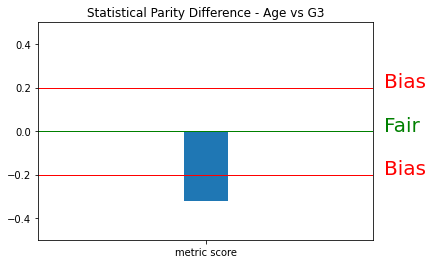

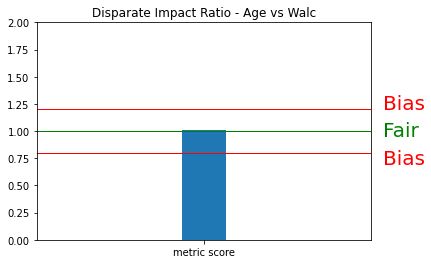

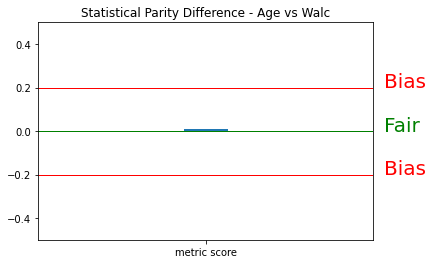

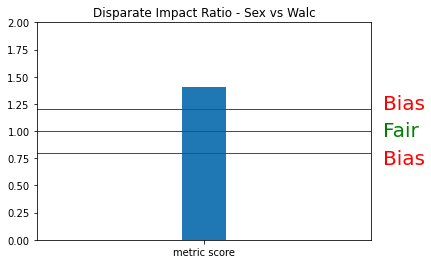

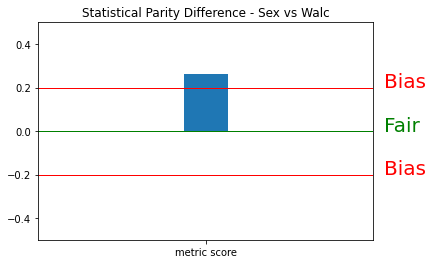

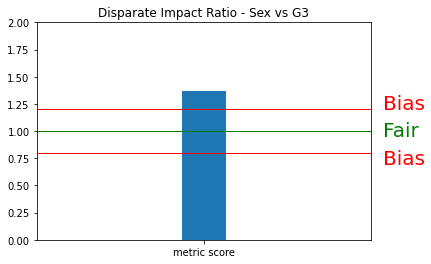

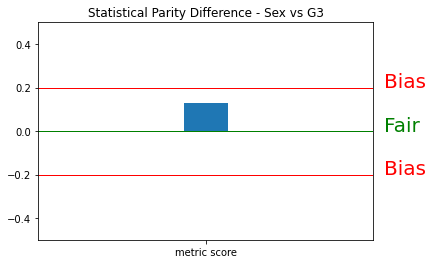

In [15]:
# import matplotlib.pyplot as plt

# 3.2 - 1
fig, ax = plt.subplots(1, 1)
ax.bar('metric score', di_32_1, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([0, 2])
ax.set_title('Disparate Impact Ratio - Age vs G3')
plt.axhline(y=1, linewidth=1, color = 'green')
plt.axhline(y=0.8, linewidth=1, color = 'red')
plt.axhline(y=1.2, linewidth=1, color = 'red')
plt.text(3.2, 0.95, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.4, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, 1.5, 'Bias', fontsize = 20, color = 'red')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.bar('metric score', spd_32_1, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([-0.5, 0.5])
ax.set_title('Statistical Parity Difference - Age vs G3')
plt.axhline(y=0, linewidth=1, color = 'green')
plt.axhline(y=0.2, linewidth=1, color = 'red')
plt.axhline(y=-0.2, linewidth=1, color = 'red')
plt.text(3.2, 0, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.2, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, -0.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

# 3.2 - 2
fig, ax = plt.subplots(1, 1)
ax.bar('metric score', di_32_2, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([0, 2])
ax.set_title('Disparate Impact Ratio - Age vs Walc')
plt.axhline(y=1, linewidth=1, color = 'green')
plt.axhline(y=0.8, linewidth=1, color = 'red')
plt.axhline(y=1.2, linewidth=1, color = 'red')
plt.text(3.2, 0.95, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.7, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, 1.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.bar('metric score', spd_32_2, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([-0.5, 0.5])
ax.set_title('Statistical Parity Difference - Age vs Walc')
plt.axhline(y=0, linewidth=1, color = 'green')
plt.axhline(y=0.2, linewidth=1, color = 'red')
plt.axhline(y=-0.2, linewidth=1, color = 'red')
plt.text(3.2, 0, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.2, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, -0.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

# 3.2 - 3
fig, ax = plt.subplots(1, 1)
ax.bar('metric score', di_32_3, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([0, 2])
ax.set_title('Disparate Impact Ratio - Sex vs Walc')
plt.axhline(y=1, linewidth=1, color = 'green')
plt.axhline(y=0.8, linewidth=1, color = 'red')
plt.axhline(y=1.2, linewidth=1, color = 'red')
plt.text(3.2, 0.95, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.7, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, 1.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.bar('metric score', spd_32_3, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([-0.5, 0.5])
ax.set_title('Statistical Parity Difference - Sex vs Walc')
plt.axhline(y=0, linewidth=1, color = 'green')
plt.axhline(y=0.2, linewidth=1, color = 'red')
plt.axhline(y=-0.2, linewidth=1, color = 'red')
plt.text(3.2, 0, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.2, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, -0.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

# 3.2 - 4
fig, ax = plt.subplots(1, 1)
ax.bar('metric score', di_32_4, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([0, 2])
ax.set_title('Disparate Impact Ratio - Sex vs G3')
plt.axhline(y=1, linewidth=1, color = 'green')
plt.axhline(y=0.8, linewidth=1, color = 'red')
plt.axhline(y=1.2, linewidth=1, color = 'red')
plt.text(3.2, 0.95, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.7, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, 1.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.bar('metric score', spd_32_4, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([-0.5, 0.5])
ax.set_title('Statistical Parity Difference - Sex vs G3')
plt.axhline(y=0, linewidth=1, color = 'green')
plt.axhline(y=0.2, linewidth=1, color = 'red')
plt.axhline(y=-0.2, linewidth=1, color = 'red')
plt.text(3.2, 0, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.2, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, -0.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

Step 3.4 Metrics

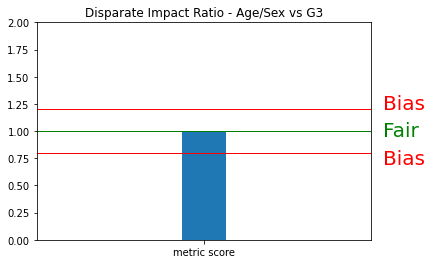

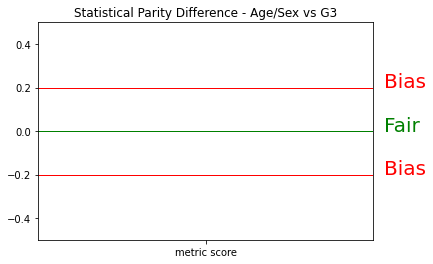

Note: Graph looks empty because statistical parity difference is zero for Age/Sex vs G3


In [16]:
# 3.4
fig, ax = plt.subplots(1, 1)
ax.bar('metric score', di_34, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([0, 2])
ax.set_title('Disparate Impact Ratio - Age/Sex vs G3')
plt.axhline(y=1, linewidth=1, color = 'green')
plt.axhline(y=0.8, linewidth=1, color = 'red')
plt.axhline(y=1.2, linewidth=1, color = 'red')
plt.text(3.2, 0.95, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.7, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, 1.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.bar('metric score', spd_34, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([-0.5, 0.5])
ax.set_title('Statistical Parity Difference - Age/Sex vs G3')
plt.axhline(y=0, linewidth=1, color = 'green')
plt.axhline(y=0.2, linewidth=1, color = 'red')
plt.axhline(y=-0.2, linewidth=1, color = 'red')
plt.text(3.2, 0, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.2, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, -0.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

print('Note: Graph looks empty because statistical parity difference is zero for Age/Sex vs G3')

Step 4.5 Metrics

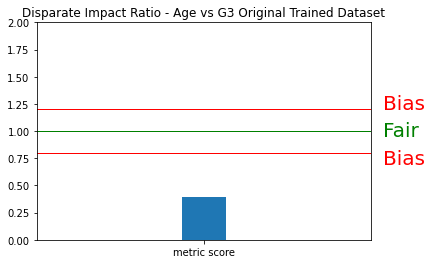

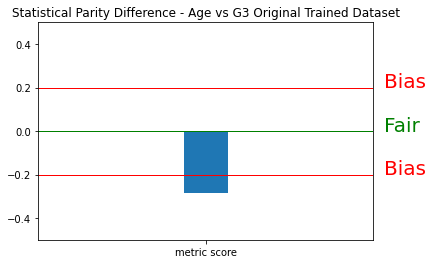

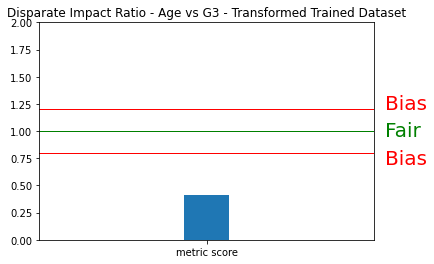

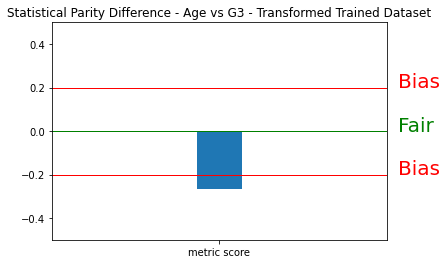

In [17]:
# 4.5 - 1
fig, ax = plt.subplots(1, 1)
ax.bar('metric score', di_45_1, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([0, 2])
ax.set_title('Disparate Impact Ratio - Age vs G3 Original Trained Dataset')
plt.axhline(y=1, linewidth=1, color = 'green')
plt.axhline(y=0.8, linewidth=1, color = 'red')
plt.axhline(y=1.2, linewidth=1, color = 'red')
plt.text(3.2, 0.95, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.7, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, 1.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.bar('metric score', spd_45_1, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([-0.5, 0.5])
ax.set_title('Statistical Parity Difference - Age vs G3 Original Trained Dataset')
plt.axhline(y=0, linewidth=1, color = 'green')
plt.axhline(y=0.2, linewidth=1, color = 'red')
plt.axhline(y=-0.2, linewidth=1, color = 'red')
plt.text(3.2, 0, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.2, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, -0.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

# 4.5 - 2
fig, ax = plt.subplots(1, 1)
ax.bar('metric score', di_45_2, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([0, 2])
ax.set_title('Disparate Impact Ratio - Age vs G3 - Transformed Trained Dataset')
plt.axhline(y=1, linewidth=1, color = 'green')
plt.axhline(y=0.8, linewidth=1, color = 'red')
plt.axhline(y=1.2, linewidth=1, color = 'red')
plt.text(3.2, 0.95, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.7, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, 1.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.bar('metric score', spd_45_2, align='center')
ax.set_xlim(-3, 3)
ax.set_ylim([-0.5, 0.5])
ax.set_title('Statistical Parity Difference - Age vs G3 - Transformed Trained Dataset')
plt.axhline(y=0, linewidth=1, color = 'green')
plt.axhline(y=0.2, linewidth=1, color = 'red')
plt.axhline(y=-0.2, linewidth=1, color = 'red')
plt.text(3.2, 0, 'Fair', fontsize = 20, color = 'green')
plt.text(3.2, 0.2, 'Bias', fontsize = 20, color = 'red')
plt.text(3.2, -0.2, 'Bias', fontsize = 20, color = 'red')
plt.show()

### Explain which fairness metric (if any) is best and provide a justification for your answer

The two fairness metrics used were Disparate Impact Ratio and Statistical Pairty Difference. They have very similar rate/ratio calculations, but we think the best metric is the Disparate Impact. Disparate Impact gives a very clear result showing if/when a privileged or unprivileged group is receiving a higher benefit. On the other hand, Statistical Parity Difference only shows the overall fairness. If the Disparate Impact is higher than 1, then the privileged group is gaining a higher benefit. If the Disparate Impact is lower than 1, then the unprivileged group is gaining a higher benefit. Additionally, Disparate Impact is not bounded by -1 and 1, which makes it easier to see when comparing the results from 2 differently biased groups.

### Individal Answers

Anthony Mossing  
The reweighing mitagated bias and increased fairness especially looking at the protected class variable Sex and dependent variable G3. The stastical parity difference went from 0.13593091 to -5.55e-17 after reweighing which is closer to the ideal fairness value of 0. The desparate impact went from 1.37194282 to 1 after reweighing which is closer to the ideal fairness value of 1. Noting that the reweighing resulted in our fairness metrics to evaluate to being fair, all of the unprivileged subgroups in Sex and G3 recieved a positive advantage while the privileged groups recieved a disadvantage. Overall, no group came out with an overall net negatve or positive because the metrics ended up evaluating to fair. An issue that may arise with reweighing the data would be that overall accuracy has a risk of being reduced.


Jay Kavarthapu  
Simply transforming the original data via reweighing dramatically improved the fairness of the data according to Statistical Parity Difference and Disparate Impact Ratio, whereas training the data (on either the transformed or the original dataset) caused negative movement for both metrics. 

Generally, in the original dataset with the dependent variable being G3 and the protected variable being Age, the unprivileged group (high school age) were benefitted if no preprocessing step was done, with slight favor to them in accordance to our fairness metrics. After training the data (either transformed or not), the fairness metrics then favored the privileged group (college aged).

There are many issues that could arise when mitigating bias this way, for instance a loss in accuracy could occur if the reweighing preprocessing step is done. We tested the accuracy of both the transformed and original trained datasets, and found that reweighing caused about a 1% decrease in score, with a marginal improvement in fairness, so this tradeoff can be seen as worth it (since both accuracy scores were in the 90s). Lower accuracy, of course, means that the model will be less reliable in predicting real world outcomes, limiting its usefulness. 


Shailesh Tappe  

In the original dataset Disparate Impact ratio for privileged and unprivileged group is over 4, which indicates that unprivileged group for final score have more positive labels, but transferred dataset after reweighing has score of 1 for disparate impact ration to get balanced labels for both privileged and unprivileged group. Algorithmic regression (i.e. Decision tree classifier) has reduced disparate impact ration to more positive for trained dataset, but transformed disparate impact ratio for trained dataset has negative change in outcome. Disparate impact is better fairness measure in gauging fairness with different algorithm and measures impact algorithmic regression


Wendy Cai 


Reweighting our original dataset significantly reduced bias which can be seen from the fairness metric values from before and after reweighting. Interestingly enough, our metric values show that for most of our protected class/dependent variable combinations, our chosen privileged group are actually at a disadvantage prior to bias mitigation. After mitigation, the fairness metric values suggest that both the privileged and unprivileged groups experience similar favorable and unfavorable outcomes, therefore our chosen privileged group experienced a positive change as a result. Our chosen unprivileged group, which prior to bias mitigation was actually at an advantage, was not disadvantaged because the resulting metric values are still fair. By using reweighting as well as other bias mitigation methods, there is sometimes a tradeoff between mitigating bias and accuracy. Depending on the use case, if high accuracy is critical, then these methods may cause issues.
